## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv and Rose.csv

**Please do perform the following questions on each of these two data sets separately.**

In [1]:
# import important libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pylab import rcParams
from statsmodels.graphics.tsaplots import month_plot # Plot time series month plot
from statsmodels.distributions.empirical_distribution import ECDF # plot Empirical cumulative distriburtion
from statsmodels.tsa.seasonal import seasonal_decompose #Decompose Timeseries
from statsmodels.tsa.stattools import adfuller # Augmented Dickey fuller test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Auto correlation & partial auto correlation plot
from statsmodels.tsa.arima_model import ARIMA # Arima model
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
os.chdir('D:\E_Backup\Data science & Business analytics_Great learning\Module_7_Time Series Forecasting\Week_4')

**1. Read the data as an appropriate Time Series data and plot the data.**

In [3]:
df = pd.read_csv('Sparkling.csv')
df.head() # first 5 rows

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
df.tail() # last 5 rows

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [5]:
#information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [6]:
# check for missing values
df.isnull().values.any()

False

In [7]:
# Create time stamp and add it to Data frame to make it time series dataframe
date = pd.date_range(start = '01/01/1980', end = '08/01/1995', freq = 'M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [8]:
df['Time_stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Sparkling,Time_stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [9]:
df.tail()

,YearMonth,Sparkling,Time_stamp
182,1995-03,1897,1995-03-31
183,1995-04,1862,1995-04-30
184,1995-05,1670,1995-05-31
185,1995-06,1688,1995-06-30
186,1995-07,2031,1995-07-31


In [10]:
df.set_index('Time_stamp', inplace = True)
df.drop('YearMonth', axis = 1 , inplace = True)
df.head()

,Sparkling
Time_stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [11]:
#Plot the time series to understand the behaviour of data
rcParams['figure.figsize'] = 20,8

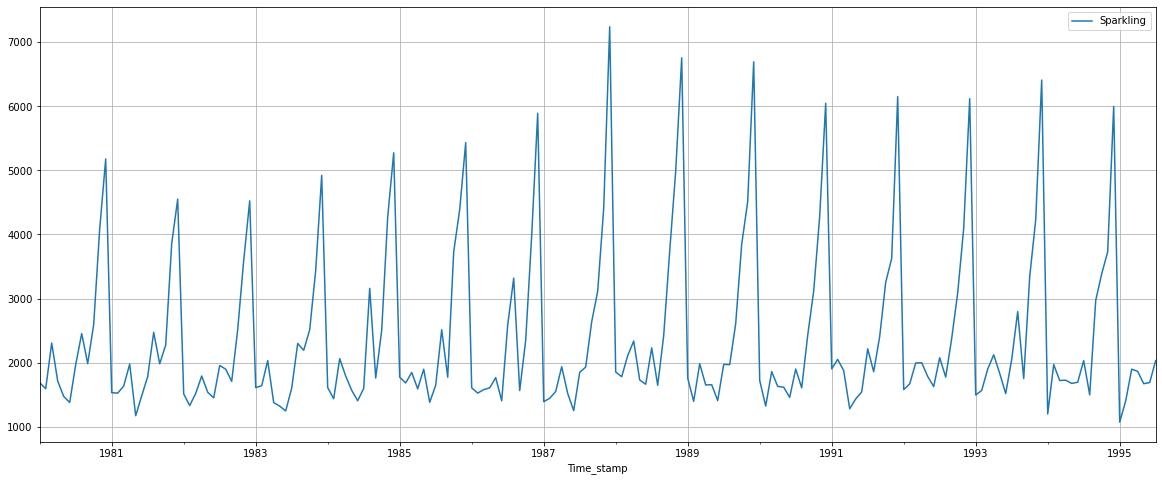

In [12]:
df.plot(grid = True);

Trend descreases initially, then increases and starts decreasing. Seasonality is also observed from the plot

In [13]:
#Decriptive Statistics
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


**2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**

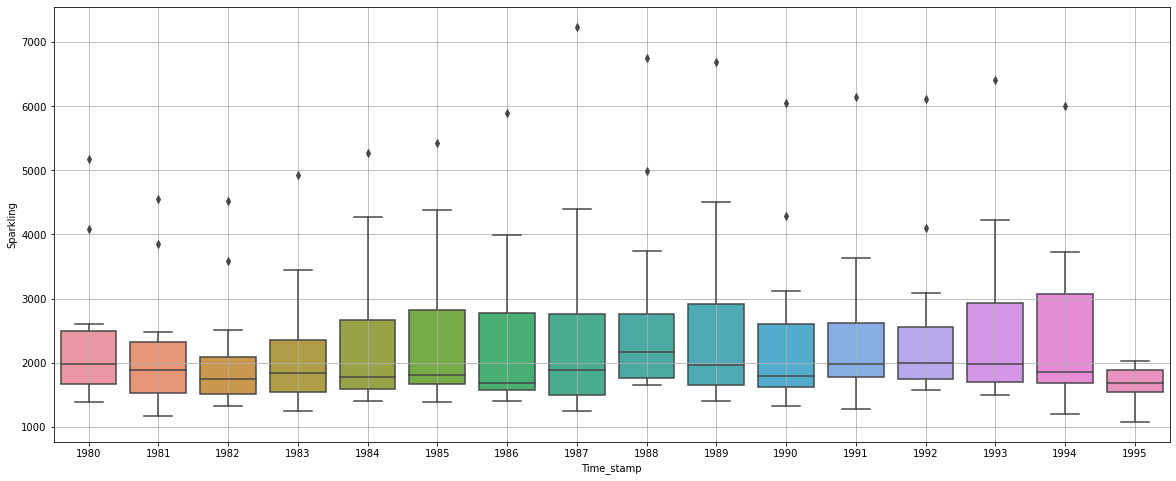

In [14]:
# plot a boxplot to understand the spread of sales across different years
sns.boxplot(x = df.index.year, y = df['Sparkling'])
plt.grid()

From year plot, we can't say much about trend because median value across the years are same.

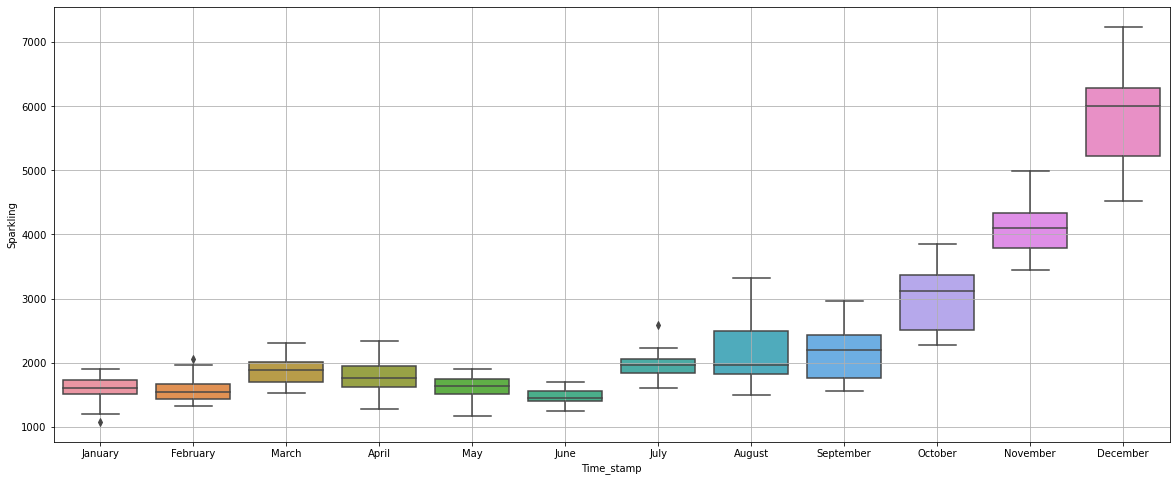

In [15]:
#Monthly boxplot
sns.boxplot(x = df.index.month_name(), y = df['Sparkling'])
plt.grid()

From monthly plot it is evident that sales are increasing from July to december then slightly decreases from January to June. June month records the lowest sales across the years

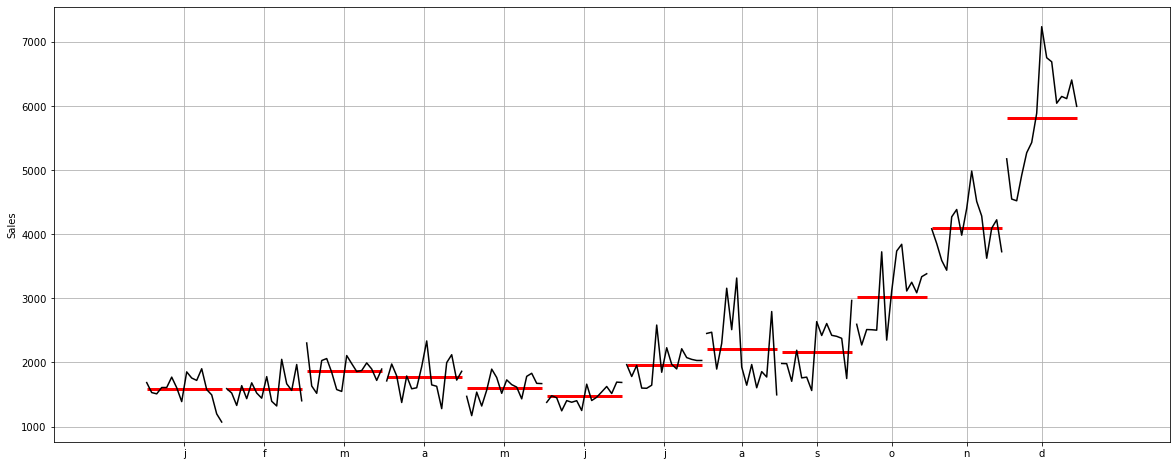

In [16]:
#monthplot_sales across different years and within different months across years.
month_plot(df['Sparkling'], ylabel = 'Sales')
plt.grid()

This plot shows us behavior of time series across months.

In [17]:
#Plot a graph of monthly sales
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


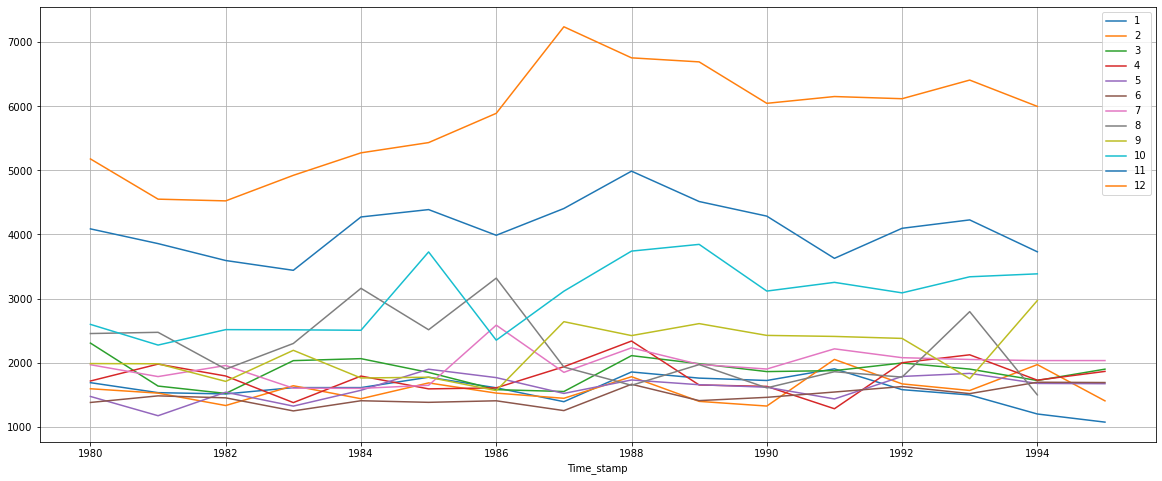

In [18]:
monthly_sales_across_years.plot(grid = True);
plt.legend(loc= 'best');

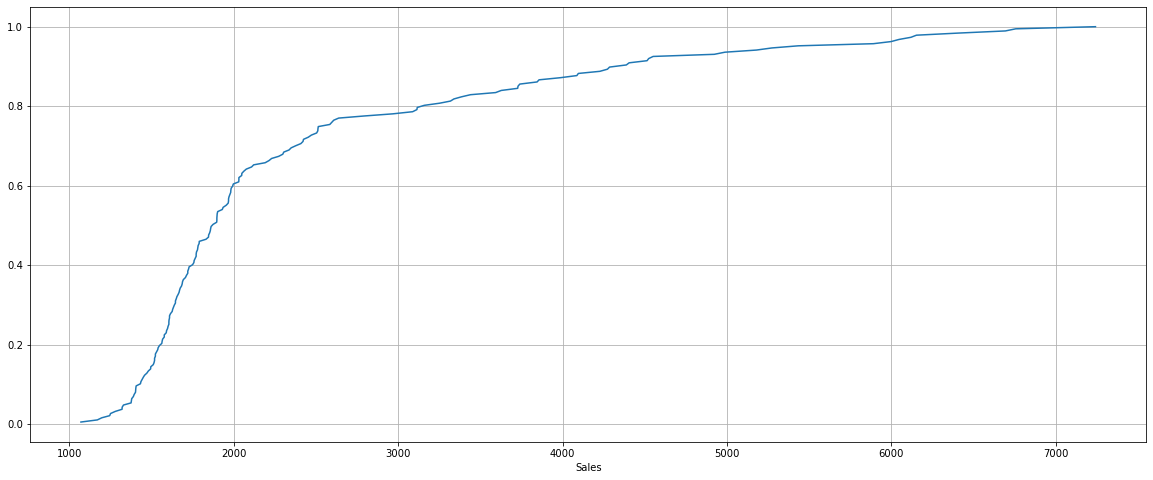

In [19]:
#Plot the empirical cumulative distribution
plt.figure(figsize = (20,8));
cdf = ECDF(df['Sparkling']);
plt.plot(cdf.x, cdf.y,label='statsmodels');
plt.grid();
plt.xlabel('Sales');

This graph tells us what percentage datapoint refers to what number of sales. Only 20% of sales is between 3000 to 6000.

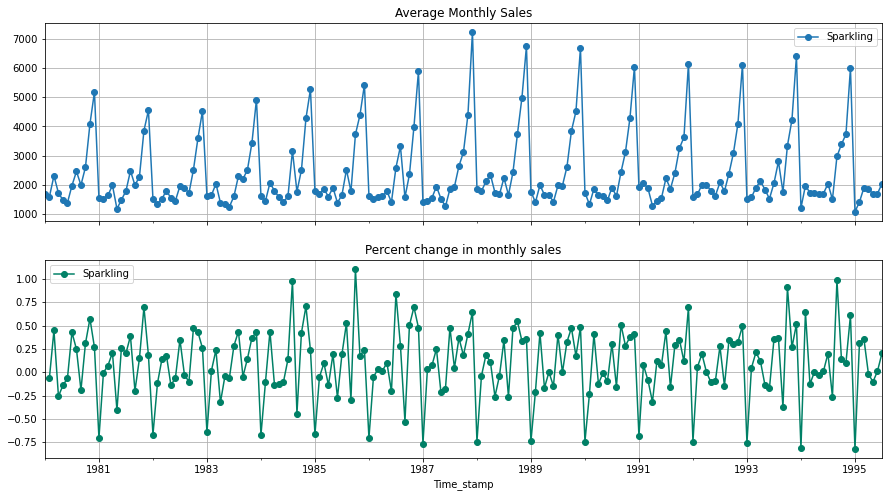

In [20]:
#Plot the average Sales per month and month on month percentage change of sales
#group by sales and get average sales and change in percentage of sale
average = df.groupby(df.index)['Sparkling'].mean()
pct_change = df.groupby(df.index)['Sparkling'].sum().pct_change()

fig , (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize = (15,8))
# plot average sales over time

ax1 = average.plot(legend = True, ax = axis1, marker = 'o', title = 'Average Monthly Sales', grid = True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot percentage change in sales
ax2 = pct_change.plot(legend = True, ax = axis2, marker = 'o',colormap = 'summer',title = 'Percent change in monthly sales', grid = True)

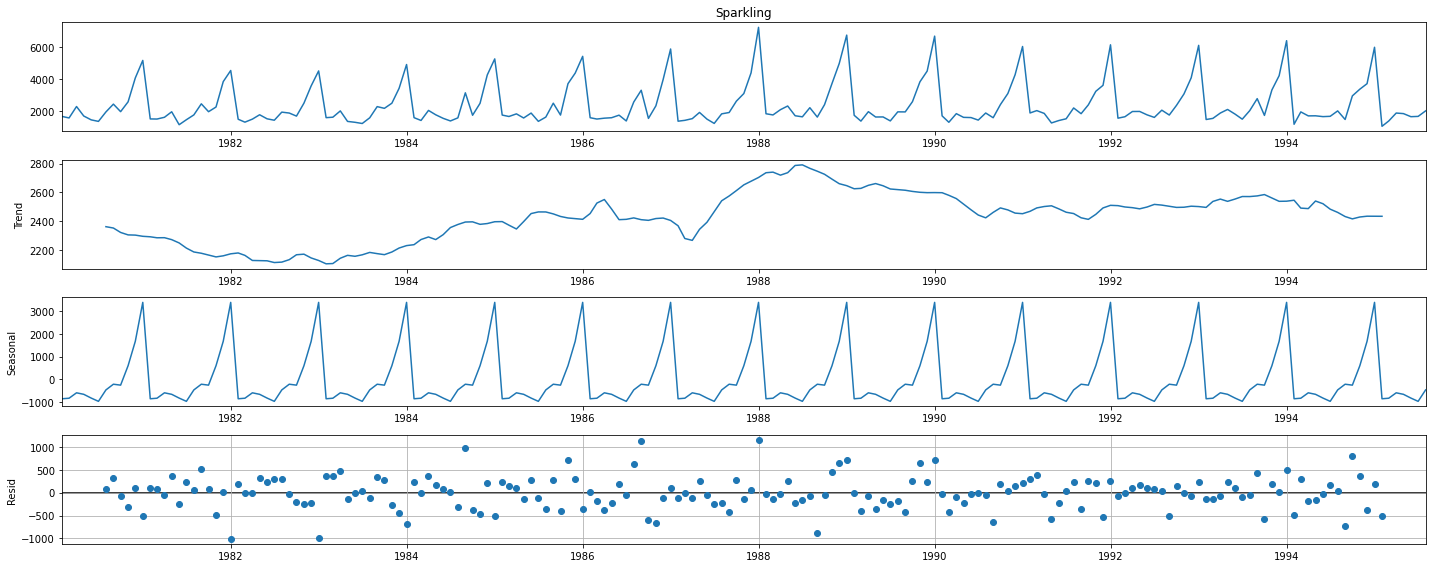

In [21]:
#Decompose Time series and plot different components
# additive decomposition
decomposition = seasonal_decompose(df['Sparkling'], model = 'additive')
decomposition.plot();
plt.grid()

From the above plot trend is not so clear, it is fluctuating (increasing, decreasing then increasing). A strong seasonality is observed. Residual has some patterns. Multiplicative model will be analysed before taking any decisions.

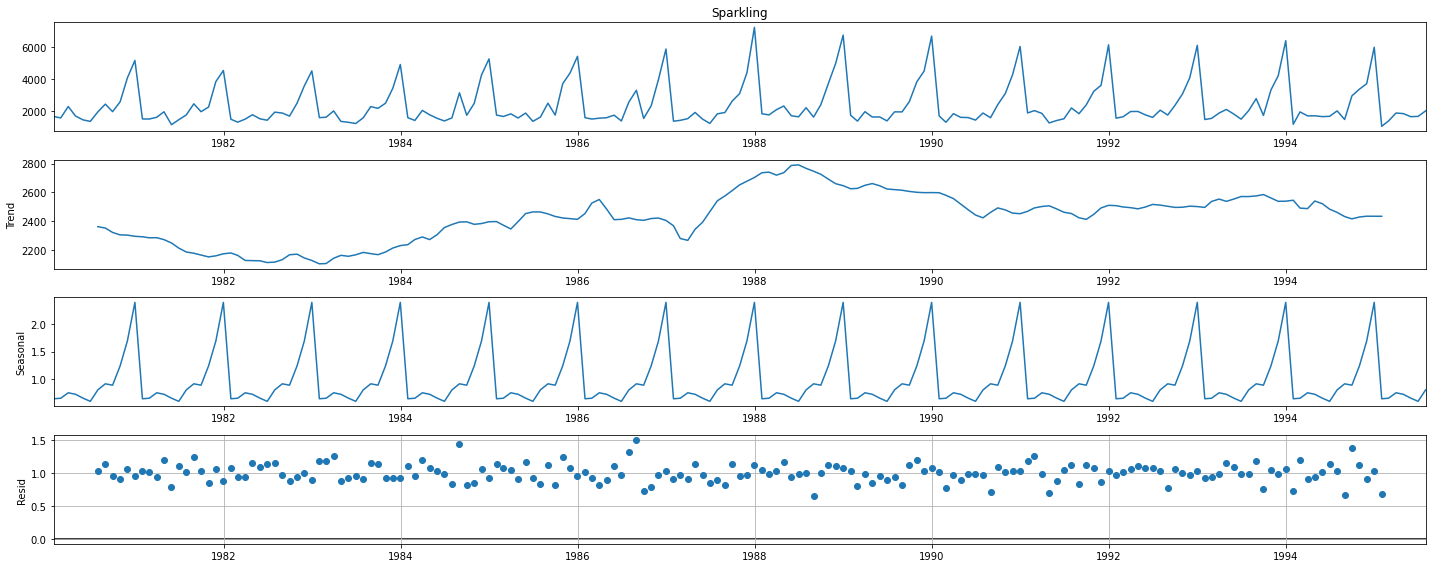

In [22]:
#Multiplicative decomposition
decomposition1 = seasonal_decompose(df['Sparkling'], model = 'multiplicative')
decomposition1.plot();
plt.grid()

Multiplicative model's trend and seasonality are same. Residual has some patterns. so additive model is considered for further analysis

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n', trend.head(10), '\n')
print('seasonality','\n', seasonality.head(10), '\n')
print('residual','\n', residual.head(10), '\n')

Trend 
 Time_stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

seasonality 
 Time_stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
1980-06-30   -967.434011
1980-07-31   -465.502265
1980-08-31   -214.332821
1980-09-30   -254.677265
1980-10-31    599.769957
Name: seasonal, dtype: float64 

residual 
 Time_stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
Name: resid, dtype: float64 



**3. Split the data into training and test. The test data should start in 1991.**

In [24]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [25]:
from IPython.display import display #Todisplay multiple dataframe from one cell 

In [26]:
print('First few rows of training data')
display(train.head())
print('Last few rows of training data')
display(train.tail())
print('First few rows of testing data')
display(test.head())
print('Last few rows of testing data')
display(test.tail())

First few rows of training data


,Sparkling
Time_stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of training data


,Sparkling
Time_stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of testing data


,Sparkling
Time_stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of testing data


,Sparkling
Time_stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [27]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


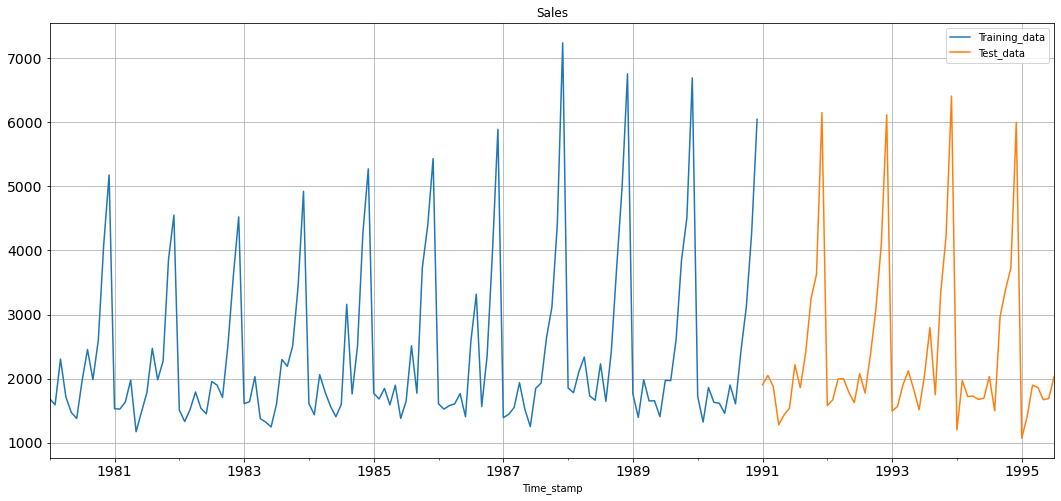

In [28]:
train['Sparkling'].plot(figsize = (18,8), fontsize = 14)
test['Sparkling'].plot(figsize = (18,8), fontsize = 14)
plt.grid()
plt.legend(['Training_data','Test_data'])
plt.title('Sales')
plt.show()

**4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.**

### Model 1 : Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [29]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance', '\n',train_time)
print('Test Time instance', '\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [30]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [31]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of training data', '\n', LinearRegression_train.head(),'\n')
print('Last few rows of training data', '\n', LinearRegression_train.tail(),'\n')
print('First few rows of test data', '\n', LinearRegression_test.head(),'\n')
print('First few rows of test data', '\n', LinearRegression_test.head(),'\n')

First few rows of training data 
             Sparkling  time
Time_stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of training data 
             Sparkling  time
Time_stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of test data 
             Sparkling  time
Time_stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

First few rows of test data 
             Sparkling  time
Time_stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 



In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

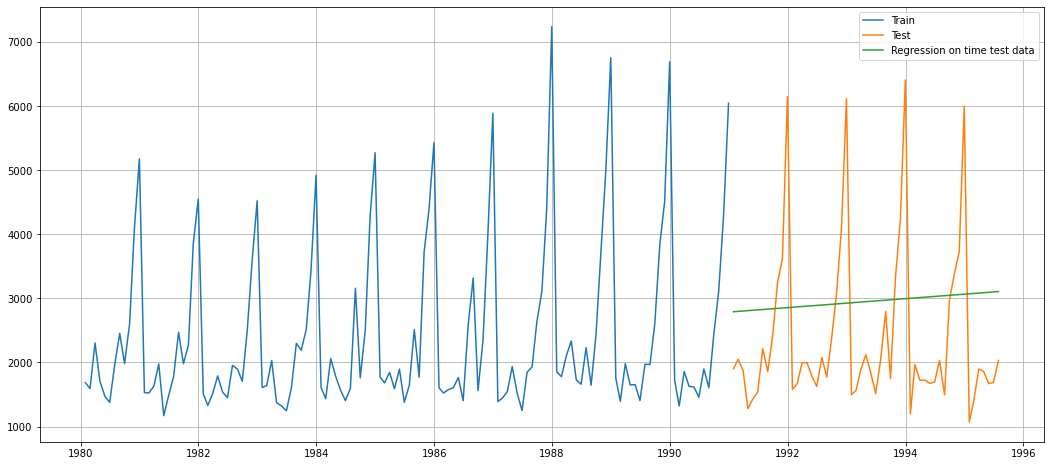

In [34]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize = (18,8))
plt.plot(train['Sparkling'],label = 'Train')
plt.plot(test['Sparkling'], label = 'Test')
plt.plot(LinearRegression_test['RegOnTime'], label = 'Regression on time test data')
plt.legend(loc = 'best')
plt.grid()

In [35]:
from sklearn import metrics #Accuracy metrics

In [36]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [37]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [38]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [39]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

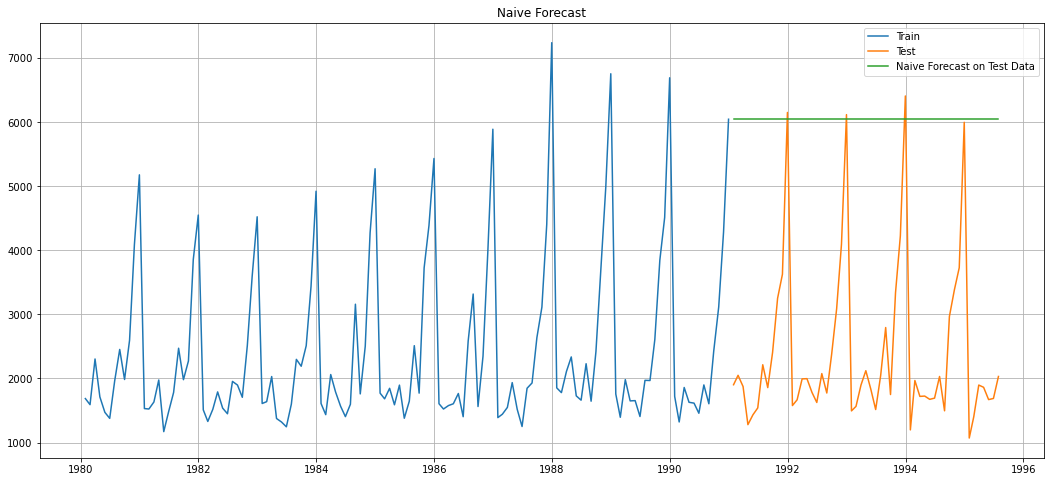

In [40]:
plt.figure(figsize=(18,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [41]:
## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [42]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


### Model 3: Simple Average

### For this particular simple average method, we will forecast by using the average of the training values.

In [43]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [44]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


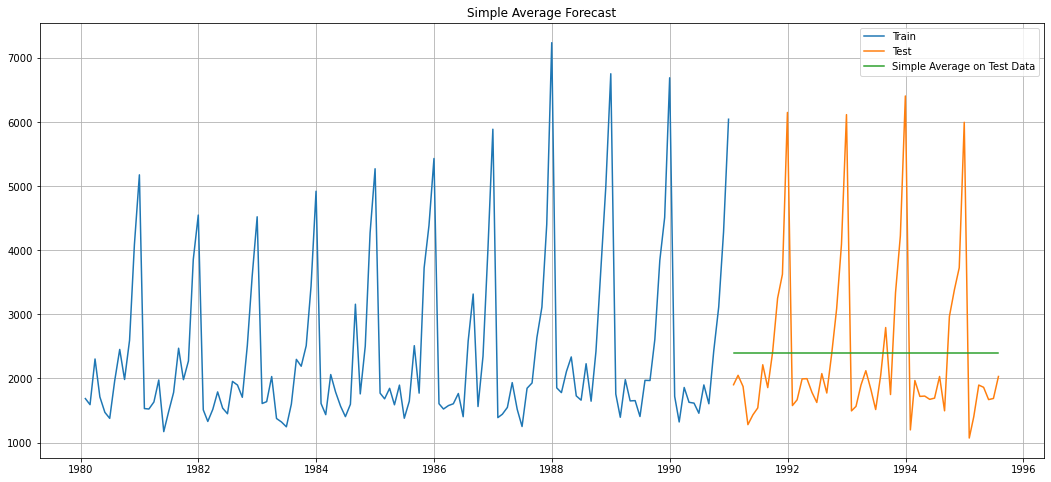

In [45]:
plt.figure(figsize=(18,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [46]:
## Test Data - RMSE 
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [47]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


### Model 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.

In [48]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


#### Trailing moving averages

In [49]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


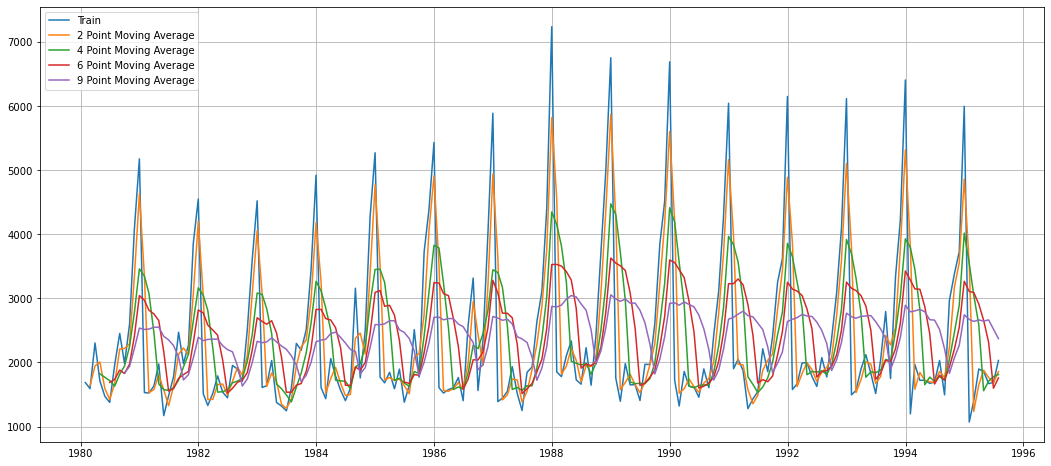

In [50]:
## Plotting on the whole data
plt.figure(figsize=(18,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [51]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.709677)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.709677):]

In [52]:
trailing_MovingAverage_train.count()

Sparkling     132
Trailing_2    131
Trailing_4    129
Trailing_6    127
Trailing_9    124
dtype: int64

In [53]:
trailing_MovingAverage_test.count()

Sparkling     55
Trailing_2    55
Trailing_4    55
Trailing_6    55
Trailing_9    55
dtype: int64

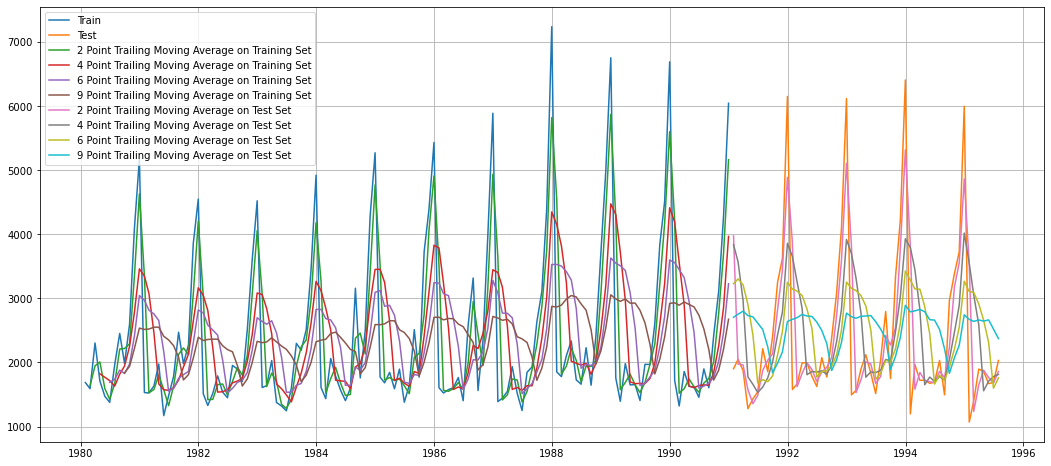

In [54]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'],label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label= '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label= '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label= '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label= '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation done only on the test data.

In [55]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [56]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

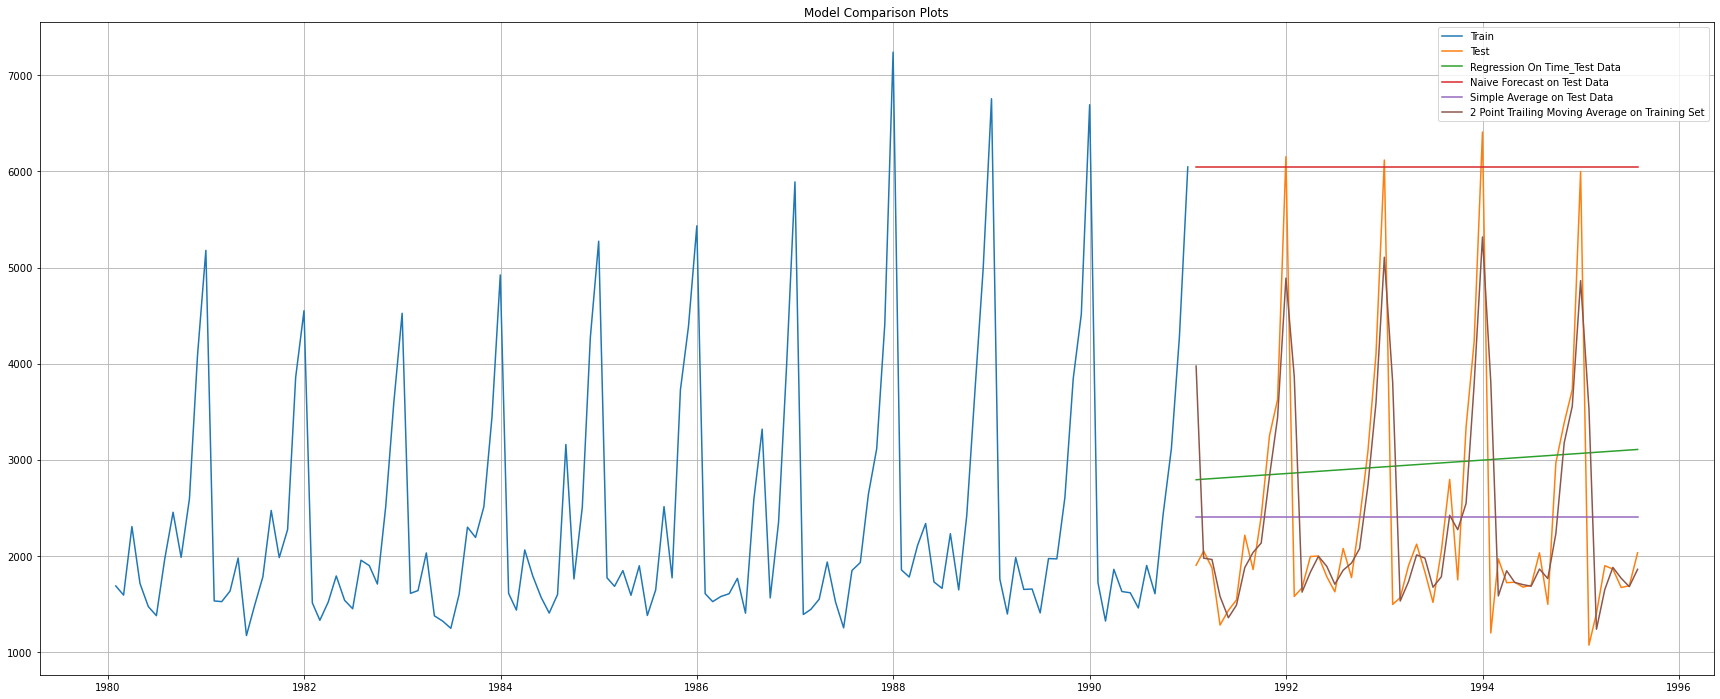

In [57]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Model 5: Simple Exponential Smoothing

In [58]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [59]:
SES_train = train.copy()
SES_test = test.copy()

In [60]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [61]:
model_SES_autofit = model_SES.fit(optimized=True)

In [62]:
model_SES_autofit.params

{'smoothing_level': 0.049606598807459476,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435326,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_stamp,,
1991-01-31,1902,2724.929339
1991-02-28,2049,2724.929339
1991-03-31,1874,2724.929339
1991-04-30,1279,2724.929339
1991-05-31,1432,2724.929339


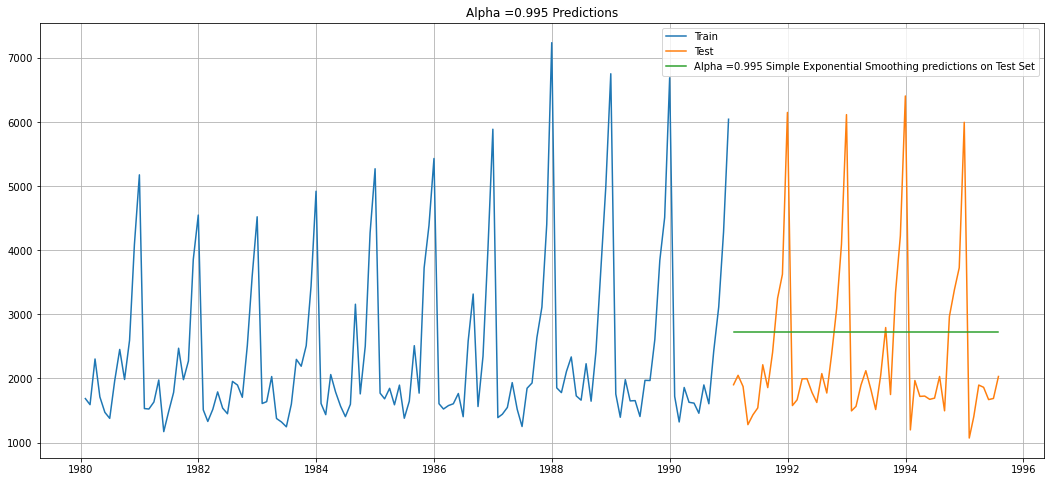

In [64]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [65]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [66]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674


Setting different alpha values. Higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [67]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [68]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

### Model Evaluation

In [69]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,1359.511747,1935.507132
1,0.4,1352.588879,2311.919615
2,0.5,1344.004369,2666.351413
3,0.6,1338.805381,2979.204388
4,0.7,1338.844308,3249.944092
5,0.8,1344.462091,3483.801006
6,0.9,1355.723518,3686.794285
7,1.0,1373.082528,3864.279352


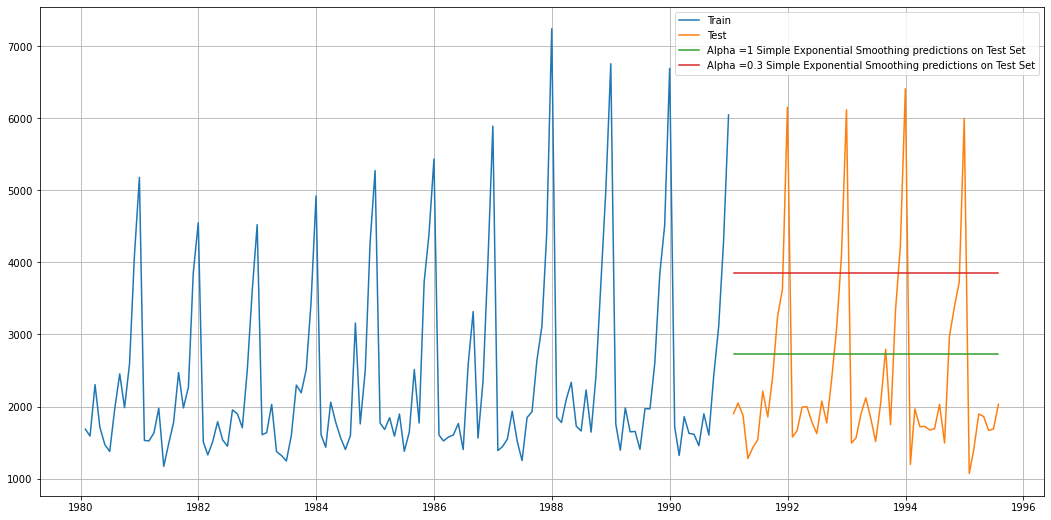

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [71]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132


## Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [72]:
DES_train = train.copy()
DES_test = test.copy()

In [73]:
model_DES = Holt(DES_train['Sparkling'])

In [74]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [75]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [76]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1592.292788,18259.110704
1,0.3,0.4,1682.573828,26069.841401
2,0.3,0.5,1771.710791,34401.512440
3,0.3,0.6,1848.576510,42162.748095
4,0.3,0.7,1899.949006,47832.397419
...,...,...,...,...
59,1.0,0.6,1753.402326,49327.087977
60,1.0,0.7,1825.187155,52655.765663
61,1.0,0.8,1902.013709,55442.273880
62,1.0,0.9,1985.368445,57823.177011


In [77]:
#sort the data frame in the ascending ordering of the 'Test RMSE' values.
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1592.292788,18259.110704
8,0.4,0.3,1569.338606,23878.496940
1,0.3,0.4,1682.573828,26069.841401
16,0.5,0.3,1530.575845,27095.532414
24,0.6,0.3,1506.449870,29070.722592


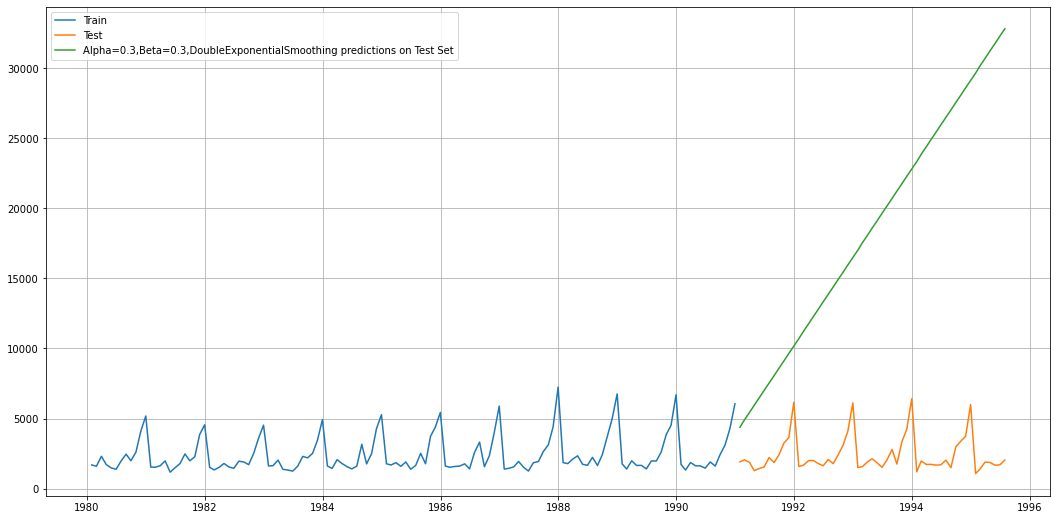

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [79]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [80]:
TES_train = train.copy()
TES_test = test.copy()

In [81]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [82]:
model_TES_autofit = model_TES.fit()

In [83]:
model_TES_autofit.params

{'smoothing_level': 0.11107239027962708,
 'smoothing_trend': 0.06170690840063879,
 'smoothing_seasonal': 0.3950788533398138,
 'damping_trend': nan,
 'initial_level': 1640.0000227337534,
 'initial_trend': -15.109117866354758,
 'initial_seasons': array([1.03477093, 0.98983304, 1.40590614, 1.20095615, 0.93935299,
        0.95195895, 1.29601204, 1.67980732, 1.35784914, 1.79340754,
        2.82843248, 3.60163829]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_stamp,,
1991-01-31,1902,1577.247616
1991-02-28,2049,1333.624996
1991-03-31,1874,1746.043741
1991-04-30,1279,1630.568737
1991-05-31,1432,1523.310226


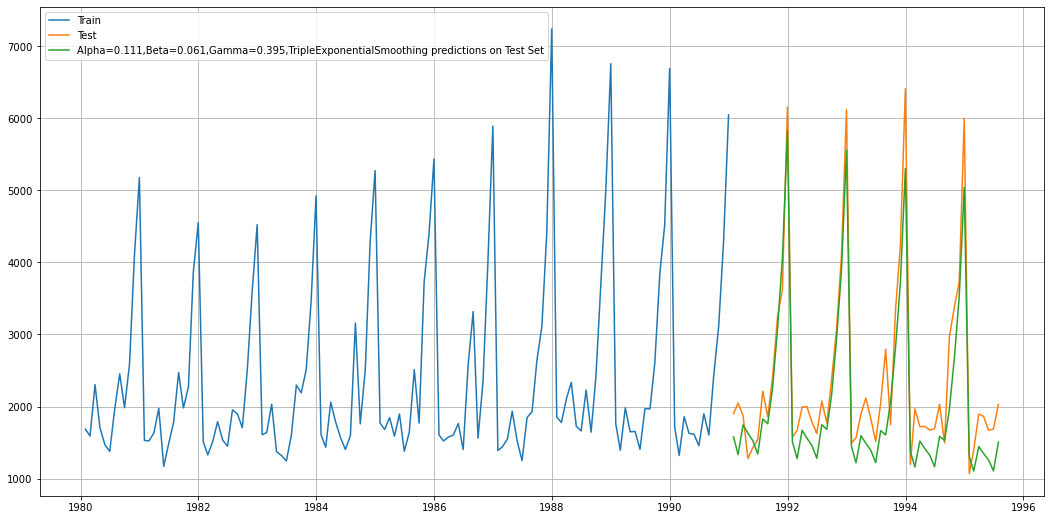

In [85]:
## Plotting on both the Training and Test using autofit
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [86]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.593


In [87]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


In [88]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [89]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [90]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,404.513320,3.927862e+02
1,0.3,0.3,0.4,402.088628,9.513202e+02
2,0.3,0.3,0.5,408.282432,1.470487e+03
3,0.3,0.3,0.6,428.631668,2.181724e+03
4,0.3,0.3,0.7,468.958530,3.513351e+03
...,...,...,...,...,...
507,1.0,1.0,0.6,153394.791826,7.989790e+05
508,1.0,1.0,0.7,94040.964958,1.074413e+06
509,1.0,1.0,0.8,102196.953755,5.010607e+06
510,1.0,1.0,0.9,77924.294413,4.318265e+05


In [91]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,404.513320,392.786198
8,0.3,0.4,0.3,424.828055,410.854547
65,0.4,0.3,0.4,435.553595,421.409170
296,0.7,0.8,0.3,700.317756,518.188752
130,0.5,0.3,0.5,498.239915,542.175497


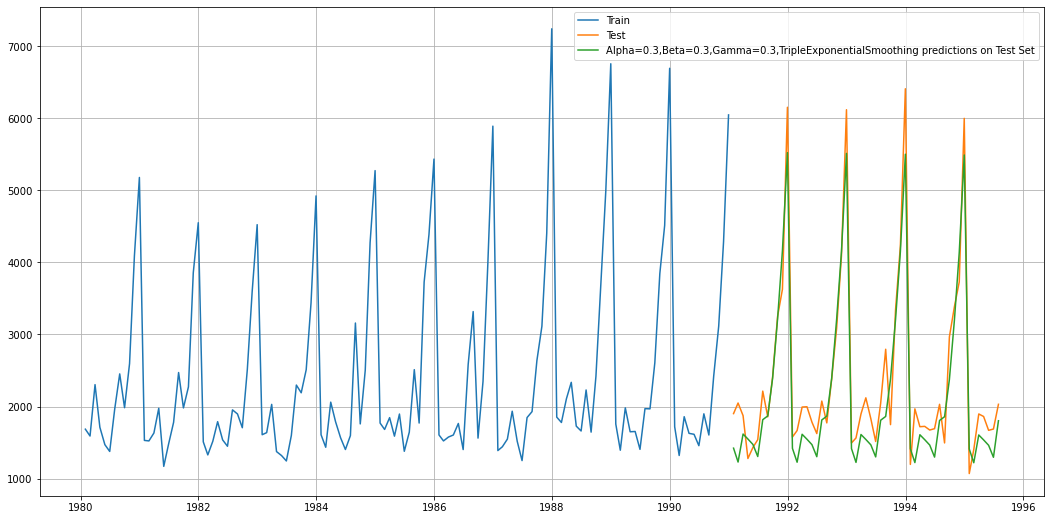

In [92]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [93]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


In [94]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
"Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing",469.593384
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
9pointTrailingMovingAverage,1346.278315
RegressionOnTime,1389.135175
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132


**5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.**

### Dickey Fuller Test

Null Hypothesis $H_0$- Series is not Stationary

Alternative Hypothesis $H_1$- Series is Stationary

In [95]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

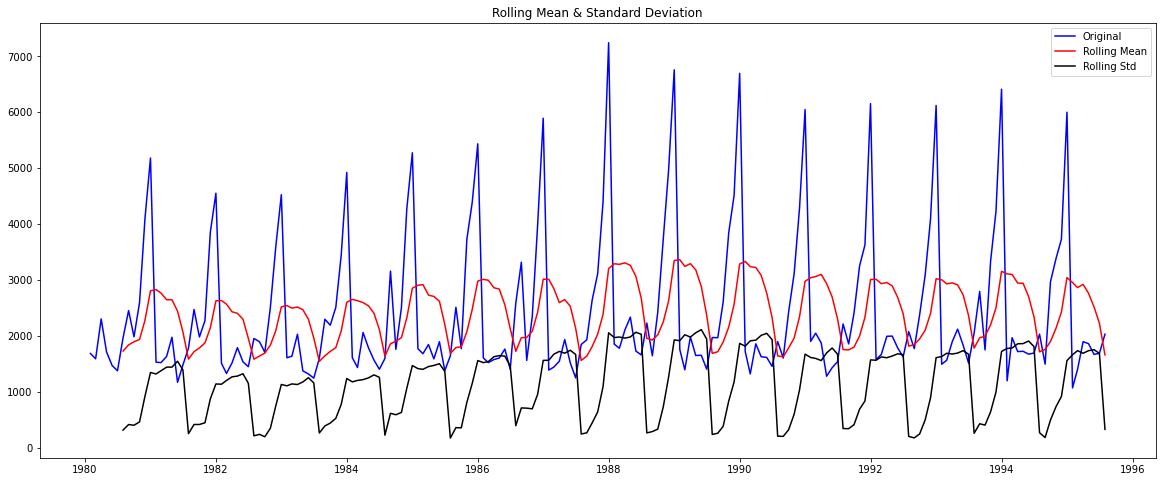

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [96]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary. Let us take a difference of order 1 and check whether the Time Series is stationary or not.

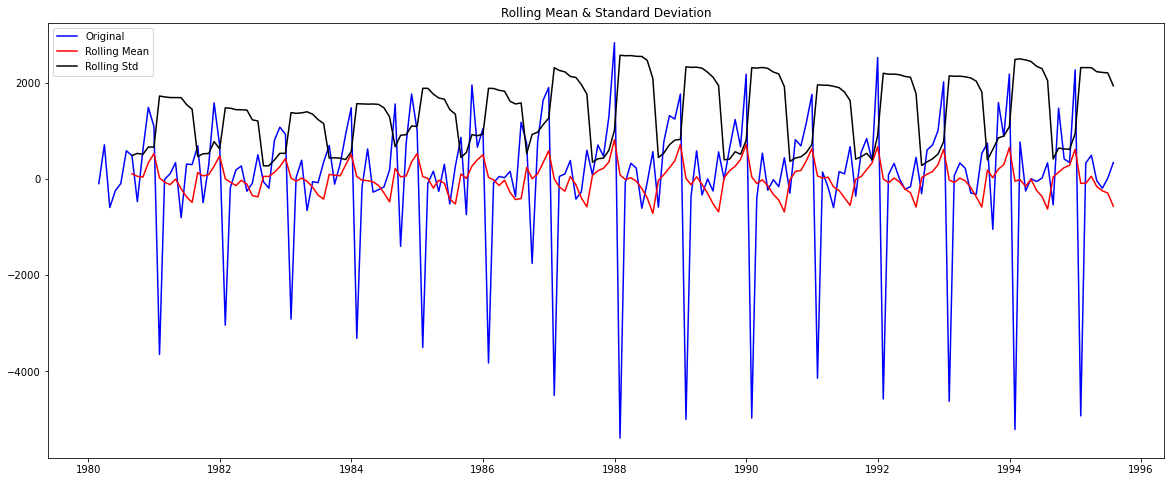

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [97]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

**6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

### Automated Version of ARIMA

In [98]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [99]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [100]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437617553
ARIMA(0, 1, 2) - AIC:2232.7830976844066
ARIMA(1, 1, 0) - AIC:2268.5280614409007
ARIMA(1, 1, 1) - AIC:2235.013945349222
ARIMA(1, 1, 2) - AIC:2233.5976471188574
ARIMA(2, 1, 0) - AIC:2262.0356001561418
ARIMA(2, 1, 1) - AIC:2232.360489894453
ARIMA(2, 1, 2) - AIC:2210.6227562275444


In [101]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.622756
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906438
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [102]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.311
Method:                       css-mle   S.D. of innovations           1013.444
Date:                Sun, 05 Sep 2021   AIC                           2210.623
Time:                        13:05:37   BIC                           2227.874
Sample:                    02-29-1980   HQIC                          2217.633
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5850      0.518     10.780      0.000       4.570       6.600
ar.L1.D.Sparkling     1.2698      0.075     17.042      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

### Predict on the Test Set using this model and evaluate the model.

In [103]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [104]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.2065102508311


In [105]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA (2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


### Automated Version of SARIMA

In [106]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [107]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [108]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845235
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235916
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389947
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791878
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158602903
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920795
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566528
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572892257
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183879
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193786773
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319654622398
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954174845
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.22450939983
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824628909
SARIMA(0, 1, 

In [109]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.929659
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [110]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 05 Sep 2021   AIC                           1555.584
Time:                                    13:07:23   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

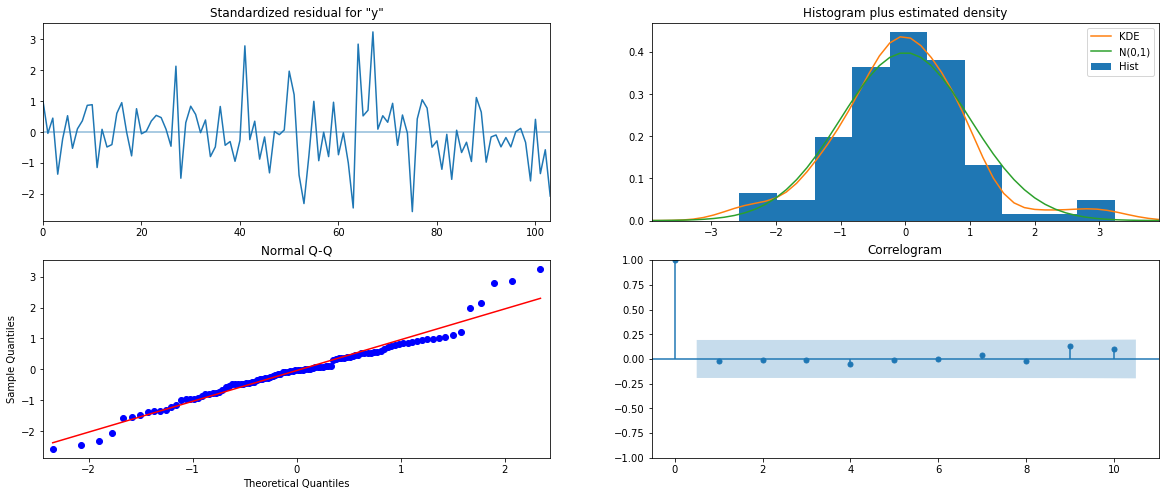

In [111]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [112]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [113]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.386418,388.344800,566.244597,2088.528239
1,1315.110768,402.007729,527.190097,2103.031440
2,1621.588857,402.001336,833.680717,2409.496997
3,1598.867465,407.239037,800.693619,2397.041311
4,1392.688227,407.969106,593.083472,2192.292982


In [114]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6213088960798


In [115]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA (1,1,2)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


**7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.**

#### ARIMA Model based on ACF and PACF

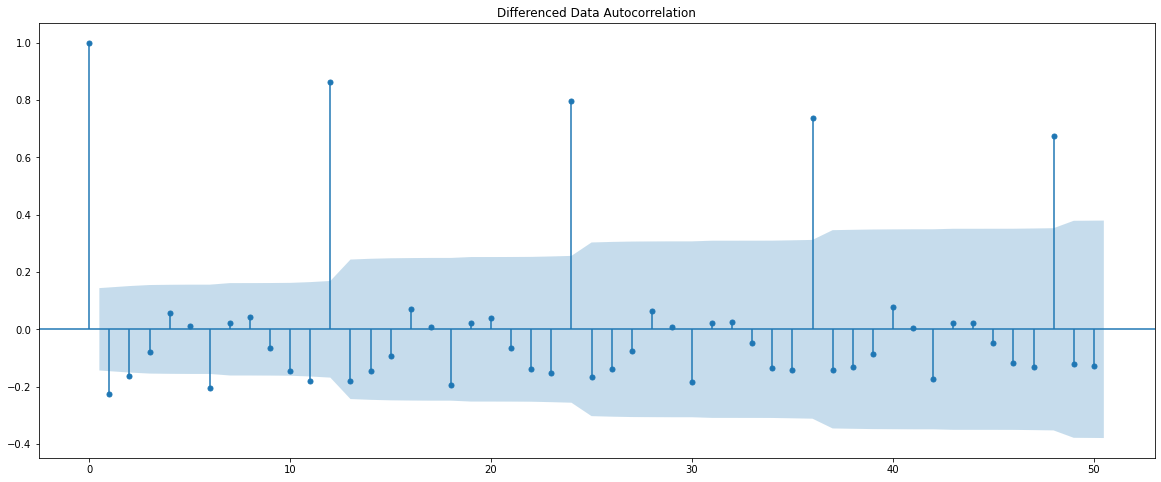

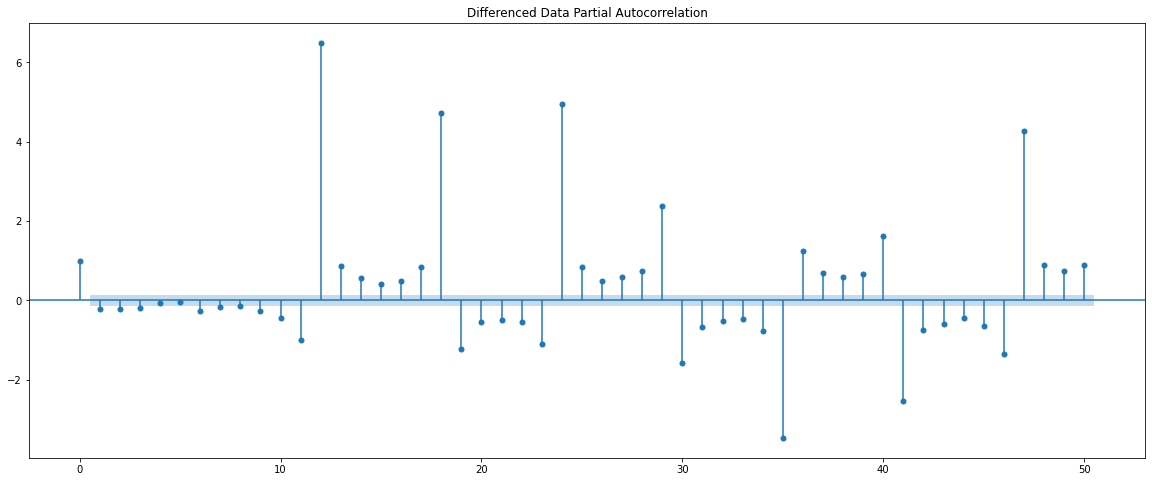

In [116]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 3 and 2.

In [117]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.463
Method:                       css-mle   S.D. of innovations           1105.893
Date:                Sun, 05 Sep 2021   AIC                           2228.927
Time:                        13:07:26   BIC                           2249.053
Sample:                    02-29-1980   HQIC                          2237.105
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9796   7.57e-05   7.89e+04      0.000       5.979       5.980
ar.L1.D.Sparkling    -0.4420        nan        nan        nan         nan         nan
ar.L2.D.Sparkling     0.

### Predict on the Test Set using this model and evaluate the model.

In [118]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [119]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1378.656099152732


In [120]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA (3,1,2) based on ACF & PACF'])
resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


### SARIMA Model : Manually looking at ACF and PACF

Let us look at the ACF and the PACF plots once more.

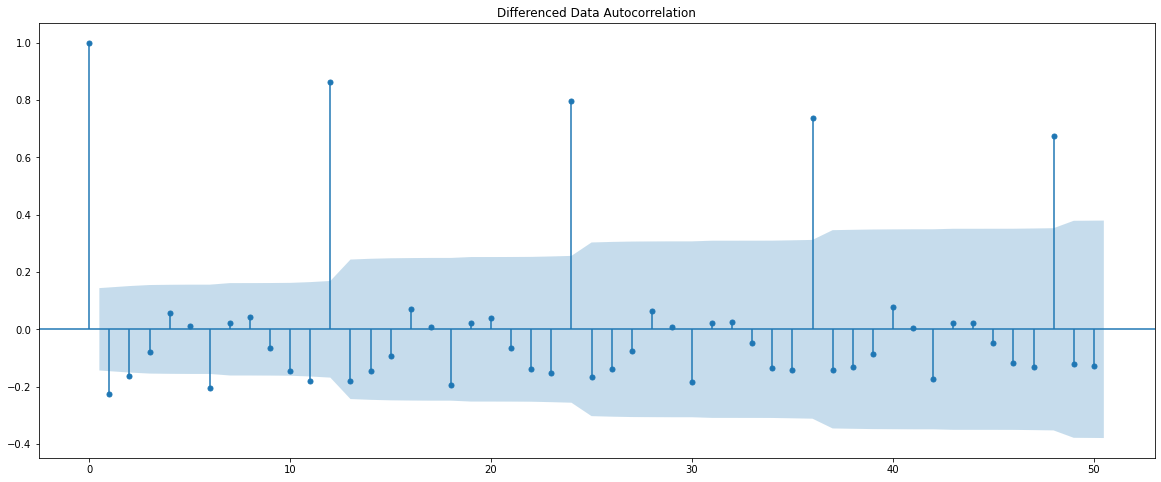

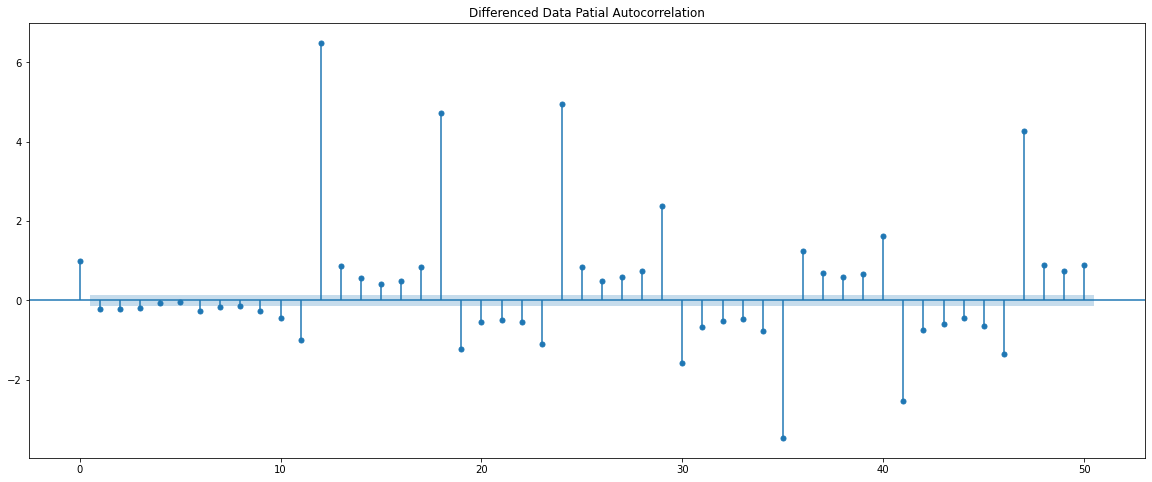

In [121]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

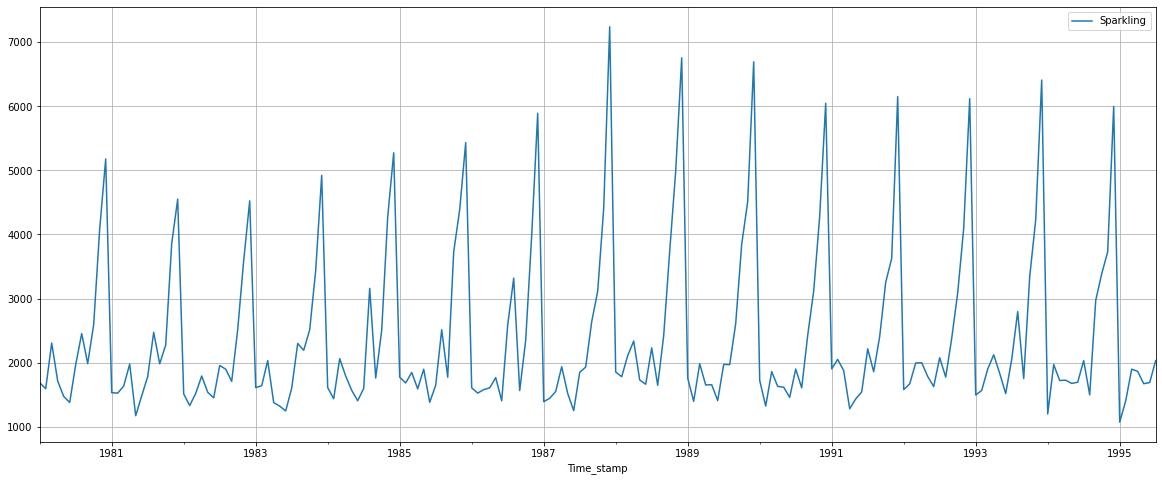

In [122]:
df.plot()
plt.grid();

We see that there is a seasonality. So, now we take a seasonal differencing and check the series.

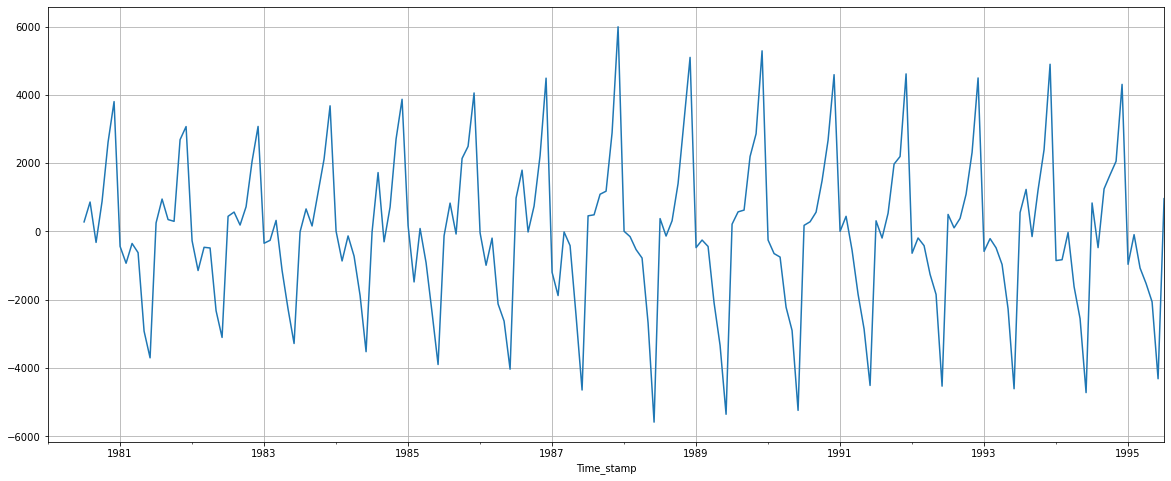

In [123]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

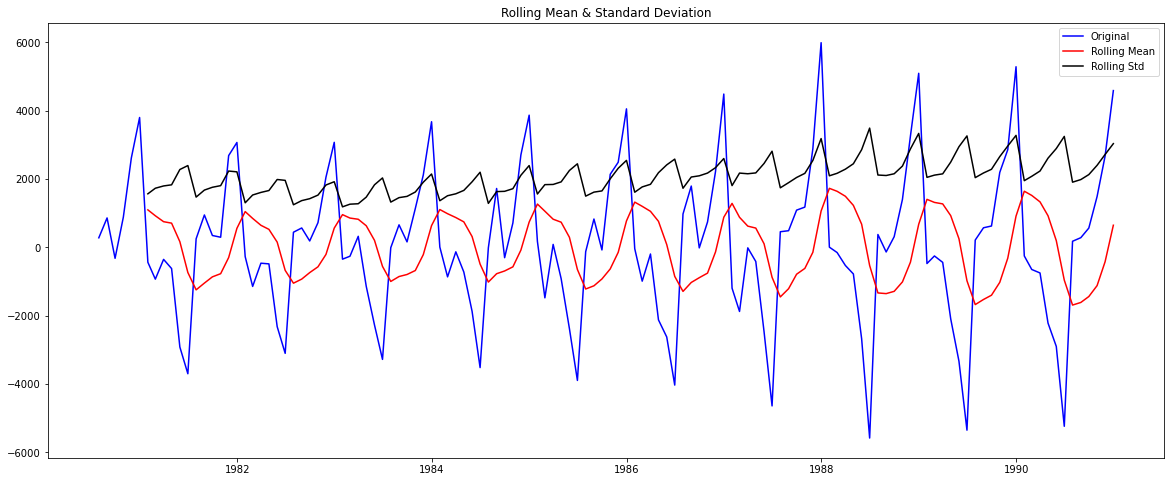

Results of Dickey-Fuller Test:
Test Statistic                -8.181919e+00
p-value                        8.088278e-13
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [124]:
test_stationarity(train['Sparkling'].diff(6).dropna())

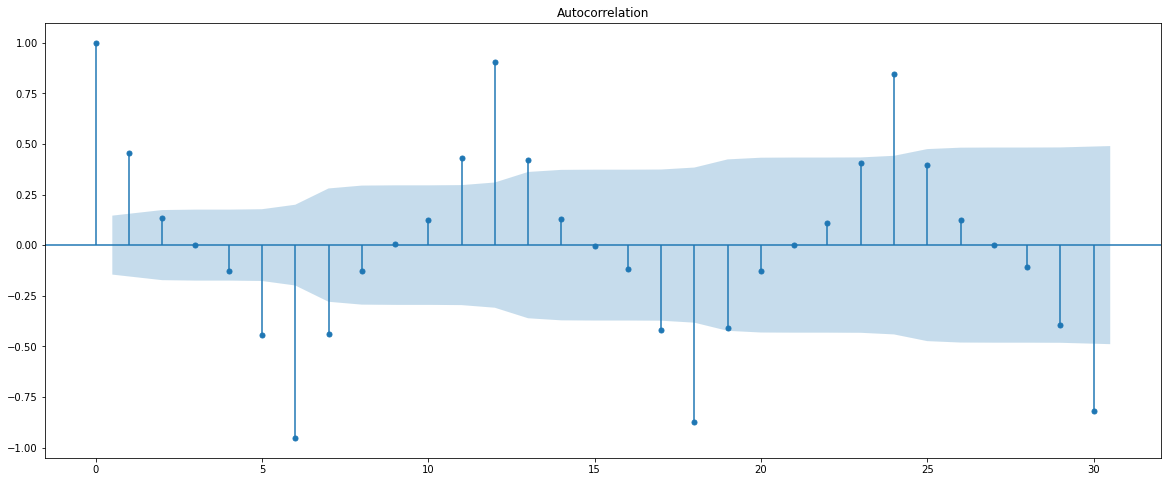

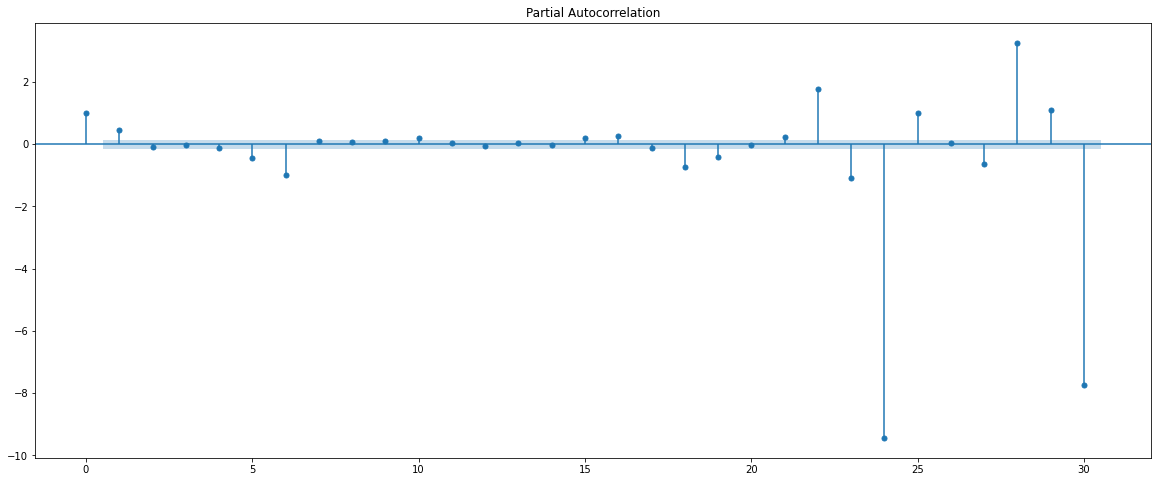

In [125]:
plot_acf((df['Sparkling'].diff(6).dropna()),lags=30)
plot_pacf((df['Sparkling'].diff(6).dropna()),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF cut-off at 1 & 1 .

In [126]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 6)   Log Likelihood                -865.947
Date:                             Sun, 05 Sep 2021   AIC                           1747.895
Time:                                     13:07:30   BIC                           1769.924
Sample:                                          0   HQIC                          1756.837
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6129      0.105     -5.858      0.000      -0.818      -0.408
ar.L2          0.1361      

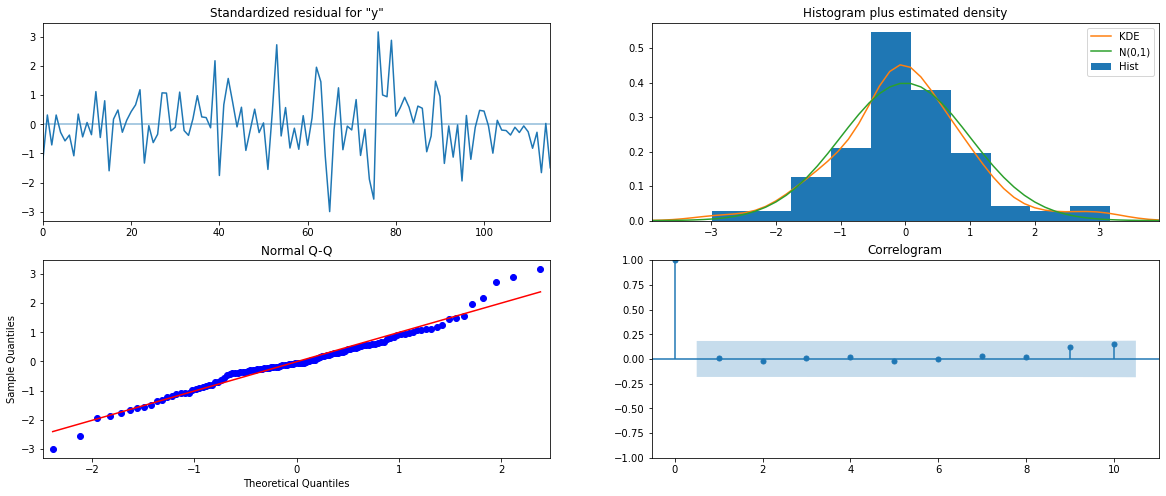

In [127]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [128]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [129]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1497.341917,416.088483,681.823476,2312.860359
1,1407.561546,435.169378,554.645239,2260.477853
2,1803.845549,435.404617,950.468182,2657.222917
3,1723.210856,436.955384,866.794041,2579.627670
4,1628.760545,437.261973,771.742827,2485.778263


In [130]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

312.690767905511


In [131]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(1,1,1,6) based on ACF & PACF'])
resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704


**8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**

In [132]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"SARIMA(3,1,2)(1,1,1,6) based on ACF & PACF",312.690768
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.786198
"Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing",469.593384
"SARIMA (1,1,2)(1,0,2,12)",528.621309
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
9pointTrailingMovingAverage,1346.278315


**9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

#### Building the most optimum model on the Full Data.

In [133]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'].values,
                                order=(3,1,2),
                                seasonal_order=(1,1,1,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 6)   Log Likelihood               -1274.645
Date:                             Sun, 05 Sep 2021   AIC                           2565.290
Time:                                     13:07:34   BIC                           2590.424
Sample:                                          0   HQIC                          2575.488
                                             - 187                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8299      0.068    -12.261      0.000      -0.963      -0.697
ar.L2          0.0225      

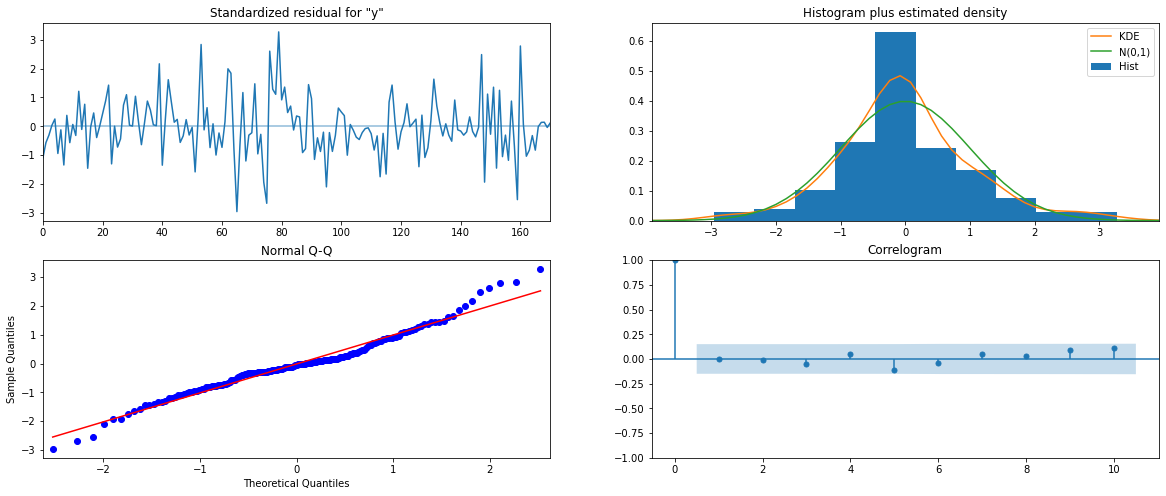

In [134]:
results_full_data_model.plot_diagnostics();

#### Evaluate the model on the whole and predict 12 months into the future.

In [135]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [136]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1474.415028,410.635717,669.583812,2279.246244
1,2938.165760,416.527643,2121.786581,3754.544938
2,3416.250519,418.853971,2595.311821,4237.189218
3,3711.934944,420.625187,2887.524727,4536.345160
4,5986.125093,421.630111,5159.745261,6812.504924


In [137]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 571.871846931169


In [138]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

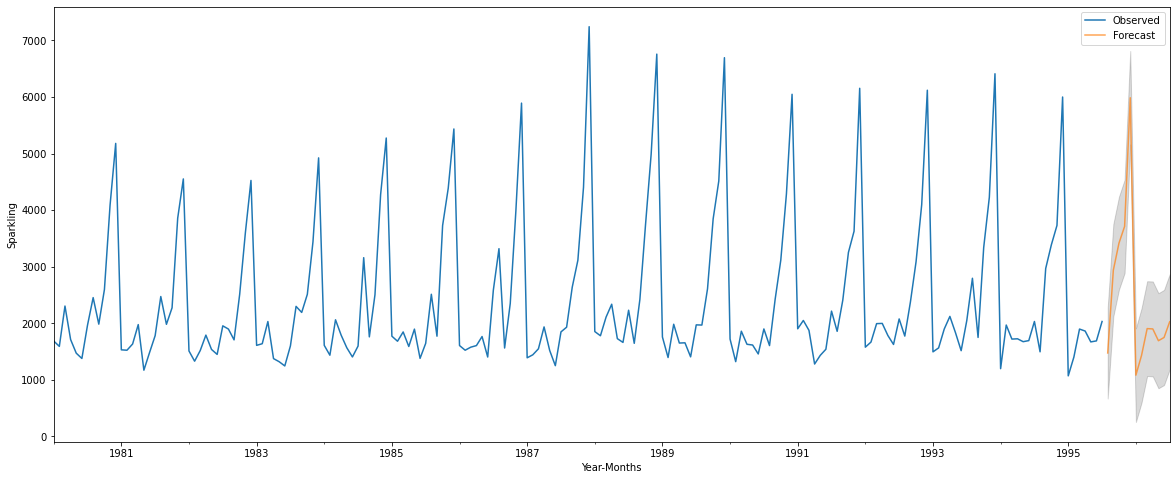

In [139]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

**10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.**

*Sales of Sparkling Wine (1980 - 1995) were analysed. Hidden details are captured by doing EDA.*

*From 1981 to 1983 trend is decreasing , 1983 to 1988 increasing, then decreasing throughout 1995.*

*Median : 1900.*

*Highest Sale on 1987, whereas lowest sale on 1995.*

*It is evident from monthly plot that sales has been increased from September to December. Stock has to be more during these time frame. January recorded the lowest sale which is right after the month of December of previous years.*

*Trend and Seasonality are there in the dataset.*

*Dataset were splitting for training and test set. Various models such as Linear regression, Naïve bayes, Simple Exponential smoothing, Double exponential smoothing, Triple exponential smoothing, ARIMA and SARIMA built on training data and tested on test data.*

*Since the dataset has seasonality, SARIMA model would be best suited model. Same was evident through RMSE value. SARIMA has the lowest RMSE value. SARIMA model was applied on full data.*

*Sales for next 12 month is predicted with confidence interval. Sales are varying drastically across the month, since shelf life of the wine is more, company should do production on median values which close to 2000. Which will meet peak demand without additional resource during the month of highest sales.*

